<a href="https://colab.research.google.com/github/Manas-arora/deep-learning/blob/main/Animals10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
import matplotlib.pyplot as plt

In [ ]:
# === 1. Define Dataset Path ===
DATASET_PATH = '/content/drive/MyDrive/Colab Notebooks/animals10'

In [ ]:
# === 2. Data Preprocessing ===
data_gen = ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.15,  # 15% for validation
    horizontal_flip=True,
    rotation_range=20,
    zoom_range=0.2
)

train_data = data_gen.flow_from_directory(
    DATASET_PATH,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = data_gen.flow_from_directory(
    DATASET_PATH,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 7579 images belonging to 1 classes.
Found 1337 images belonging to 1 classes.


In [ ]:
# === 3. Load Pre-trained Model (ResNet50) ===
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base model layers

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# === 4. Add Custom Layers ===
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(train_data.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
# === 5. Train Top Layers (Phase 1) ===
history1 = model.fit(train_data, validation_data=val_data, epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored

237/237 ━━━━━━━━━━━━━━━━━━━━ 2368s 10s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 141s 580ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 145s 595ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 199s 587ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 143s 589ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 144s 591ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 141s 583ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
237/237 ━━━━━━━━━━━━━

In [11]:
 # === 6. Fine-tune Base Layers (Phase 2) ===
base_model.trainable = True  # Unfreeze base layers
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy', metrics=['accuracy'])

history2 = model.fit(train_data, validation_data=val_data, epochs=10)

Epoch 1/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 246s 794ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 161s 660ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 159s 658ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 200s 649ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 203s 654ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 160s 661ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 159s 655ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
237/237 ━

In [12]:
# === 7. Evaluate on Test Data ===
test_data = data_gen.flow_from_directory(
    DATASET_PATH,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Use validation data as test for simplicity
)

results = model.evaluate(test_data)
print(f"Test Loss: {results[0]:.4f}, Test Accuracy: {results[1]:.4f}")

Found 1337 images belonging to 1 classes.
42/42 ━━━━━━━━━━━━━━━━━━━━ 22s 522ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Test Loss: 0.0000, Test Accuracy: 1.0000



Phase 1 Metrics:


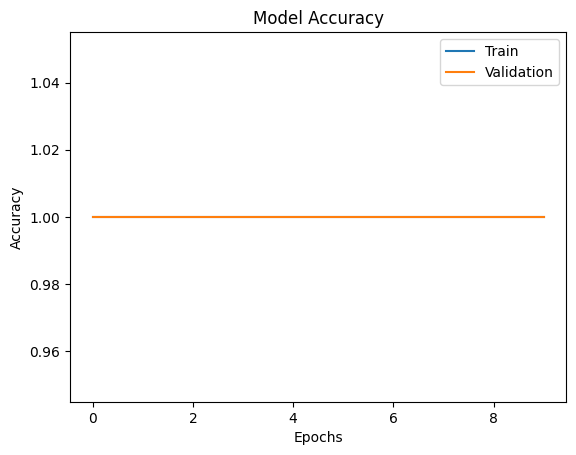

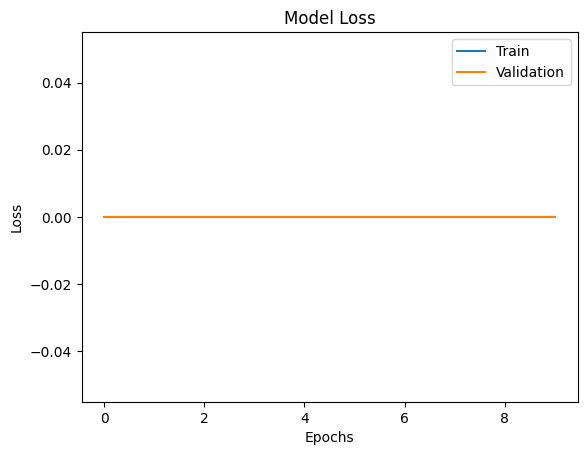


Phase 2 Metrics:


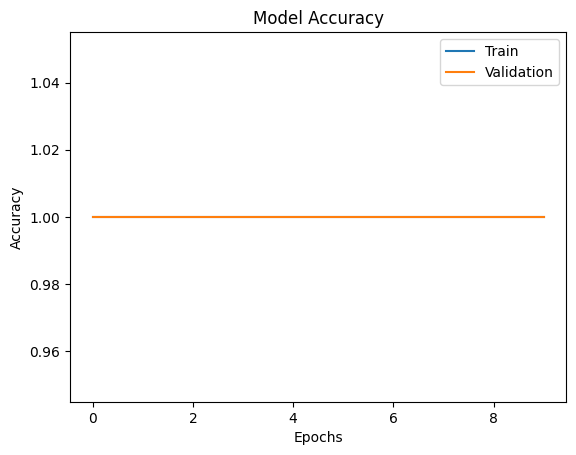

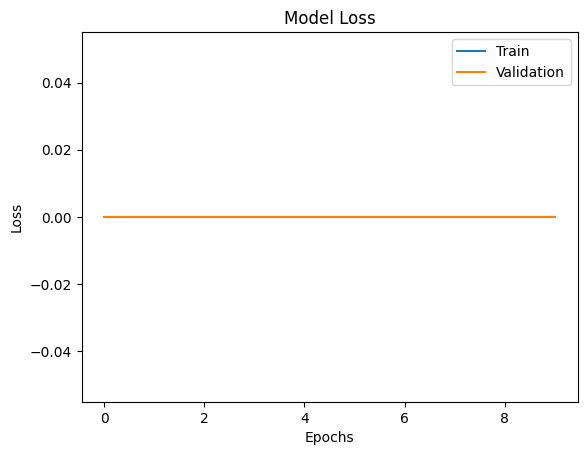

In [13]:
# === 8. Plot Training and Validation Metrics ===
def plot_metrics(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_' + metric])
    plt.title(f'Model {metric.capitalize()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend(['Train', 'Validation'])
    plt.show()

print("\nPhase 1 Metrics:")
plot_metrics(history1, 'accuracy')
plot_metrics(history1, 'loss')

print("\nPhase 2 Metrics:")
plot_metrics(history2, 'accuracy')
plot_metrics(history2, 'loss')